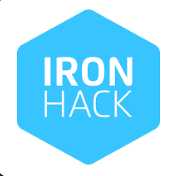

<h1 style="color: #00BFFF;">Exploratory Data Analysis Test</h1>

Exploratory data analysis (EDA) is amongst the first steps of analyzing data. 
* It is usually done with descriptive statistics, where you'll summarize the statistical aspects of your dataset and start to unravel your insights. 
* Further on, I highly recommend using data visualization in this step.

<h1 style="color: #00BFFF;">00 |</h1>

<div class="alert alert-block alert-info">
Tip # 1
Best practices; write all your libraries & functions at the beginning !
</div>

In [1]:
# pip install matplotlib
# pip install seaborn

In [36]:
# 📚 Basic libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr

In [5]:
# ⚙️ Settings
pd.set_option('display.max_columns', None) # display all columns
import warnings
warnings.filterwarnings('ignore') # ignore warnings

<h1 style="color: #00BFFF;">01 | Data Extraction</h1>

In [6]:
data = pd.read_csv('fifa_23.csv')

<h2 style="color: #008080;">Exploring the Data (First Impression)</h2>

In [7]:
data.head(3)

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,Height(in cm),Weight(in kg),TotalStats,BaseStats,Club Name,Wage(in Euro),Release Clause,Club Position,Contract Until,Club Jersey Number,Joined On,On Loan,Preferred Foot,Weak Foot Rating,Skill Moves,International Reputation,National Team Name,National Team Image Link,National Team Position,National Team Jersey Number,Attacking Work Rate,Defensive Work Rate,Pace Total,Shooting Total,Passing Total,Dribbling Total,Defending Total,Physicality Total,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Dribbling,Curve,Freekick Accuracy,LongPassing,BallControl,Acceleration,Sprint Speed,Agility,Reactions,Balance,Shot Power,Jumping,Stamina,Strength,Long Shots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,Standing Tackle,Sliding Tackle,Goalkeeper Diving,Goalkeeper Handling,GoalkeeperKicking,Goalkeeper Positioning,Goalkeeper Reflexes,ST Rating,LW Rating,LF Rating,CF Rating,RF Rating,RW Rating,CAM Rating,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,169,67,2190,452,Paris Saint-Germain,195000,99900000,RW,2023,30,2021,-,Left,4,4,5,Argentina,https://cdn.sofifa.net/flags/ar.png,RW,10,Low,Low,81,89,90,94,34,64,84,90,70,91,88,95,93,93,90,93,87,76,91,92,95,86,68,70,68,91,44,40,93,94,75,96,20,35,24,6,11,15,14,8,90,90,91,91,91,90,91,91,88,91,67,66,67,62,53,62,22
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,185,81,2147,455,Real Madrid CF,450000,131199999,CF,2023,9,2009,-,Right,4,4,4,France,https://cdn.sofifa.net/flags/fr.png,ST,19,Medium,Medium,80,88,83,87,39,78,75,92,90,89,88,87,82,73,76,91,79,80,78,92,72,87,79,82,82,80,63,39,92,89,84,90,43,24,18,13,11,5,5,7,91,87,89,89,89,87,91,89,84,89,67,67,67,63,58,63,21
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,185,81,2205,458,FC Barcelona,420000,172200000,ST,2025,9,2022,-,Right,4,4,5,Poland,https://cdn.sofifa.net/flags/pl.png,ST,9,High,Medium,75,91,79,86,44,83,71,94,91,84,89,85,79,85,70,89,76,75,77,93,82,91,85,76,87,84,81,49,94,81,90,88,35,42,19,15,6,12,8,10,91,85,88,88,88,85,88,86,83,86,67,69,67,64,63,64,22


In [8]:
data.shape

(18539, 89)

**First impression:**
    
_____________

The following dataset is a collection of **one-year** 18.539 player information distributed among 89 different columns. The majority of our data types are mostly **numericals** (71 integers / 18 objects).

Our **project goal** is to identify players who have the potential to become **the next "Mbappé"**. After reading the [documentation](https://www.kaggle.com/datasets/ekrembayar/fifa-21-complete-player-dataset?select=fifa21_male2.csv) we wil proceed with the following **strategy**:

1. The **target** of our dataset will be `Overall Score`, which is a summary of a player's performance and potential. 
2. Through **Exploratory Data Analysis** we will identify the features that contribute to this prediction.
_____________

<h2 style="color: #008080;">Column standardization</h2>

In [11]:
data.columns = [column.lower().replace(" ", "_") for column in data.columns]
data

,known_as,full_name,overall,potential,value(in_euro),positions_played,best_position,nationality,image_link,age,height(in_cm),weight(in_kg),totalstats,basestats,club_name,wage(in_euro),release_clause,club_position,contract_until,club_jersey_number,joined_on,on_loan,preferred_foot,weak_foot_rating,skill_moves,international_reputation,national_team_name,national_team_image_link,national_team_position,national_team_jersey_number,attacking_work_rate,defensive_work_rate,pace_total,shooting_total,passing_total,dribbling_total,defending_total,physicality_total,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,freekick_accuracy,longpassing,ballcontrol,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,goalkeeper_diving,goalkeeper_handling,_goalkeeperkicking,goalkeeper_positioning,goalkeeper_reflexes,st_rating,lw_rating,lf_rating,cf_rating,rf_rating,rw_rating,cam_rating,lm_rating,cm_rating,rm_rating,lwb_rating,cdm_rating,rwb_rating,lb_rating,cb_rating,rb_rating,gk_rating
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,169,67,2190,452,Paris Saint-Germain,195000,99900000,RW,2023,30,2021,-,Left,4,4,5,Argentina,https://cdn.sofifa.net/flags/ar.png,RW,10,Low,Low,81,89,90,94,34,64,84,90,70,91,88,95,93,93,90,93,87,76,91,92,95,86,68,70,68,91,44,40,93,94,75,96,20,35,24,6,11,15,14,8,90,90,91,91,91,90,91,91,88,91,67,66,67,62,53,62,22
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,185,81,2147,455,Real Madrid CF,450000,131199999,CF,2023,9,2009,-,Right,4,4,4,France,https://cdn.sofifa.net/flags/fr.png,ST,19,Medium,Medium,80,88,83,87,39,78,75,92,90,89,88,87,82,73,76,91,79,80,78,92,72,87,79,82,82,80,63,39,92,89,84,90,43,24,18,13,11,5,5,7,91,87,89,89,89,87,91,89,84,89,67,67,67,63,58,63,21
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,185,81,2205,458,FC Barcelona,420000,172200000,ST,2025,9,2022,-,Right,4,4,5,Poland,https://cdn.sofifa.net/flags/pl.png,ST,9,High,Medium,75,91,79,86,44,83,71,94,91,84,89,85,79,85,70,89,76,75,77,93,82,91,85,76,87,84,81,49,94,81,90,88,35,42,19,15,6,12,8,10,91,85,88,88,88,85,88,86,83,86,67,69,67,64,63,64,22
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,181,70,2303,483,Manchester City,350000,198900000,CM,2025,17,2015,-,Right,5,4,4,Belgium,https://cdn.sofifa.net/flags/be.png,RF,7,High,High,74,88,93,87,64,77,94,85,55,93,83,88,89,83,93,90,76,73,76,91,78,92,63,88,74,91,75,66,88,94,83,89,68,65,53,15,13,5,10,13,86,88,87,87,87,88,91,91,91,91,82,82,82,78,72,78,24
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,182,73,2177,470,Paris Saint-Germain,230000,366700000,ST,2024,7,2018,-,Right,4,5,4,France,https://cdn.sofifa.net/flags/fr.png,ST,10,High,Low,97,89,80,92,36,76,78,93,72,85,83,93,80,69,71,91,97,97,93,93,81,88,77,87,76,82,64,38,92,83,80,88,26,34,32,13,5,7,11,6,92,90,90,90,90,90,92,92,84,92,70,66,70,66,57,66,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18534,D. Collins,Darren Collins,47,56,110000,"ST,RM",CAM,Republic of Ireland,https://cdn.sofifa.net/players/243/725/23_60.png,21,174,68,1287,274,Sligo Rovers,500,193000,RES,2022,20,2018,-,Right,3,2,1,-,-,-,-,Medium,Medium,68,48,43,51,31,33,40,49,30,42,48,50,53,50,33,48,69,68,59,44,63,50,45,32,31,46,37,22,50,52,40,47,39,29,27,6,9,5,13,8,49,50,50,50,50,50,51,50,44,50,41,38,41,40,36,4

<h2 style="color: #008080;">Copy as best practices</h2>

In [10]:
df = data.copy()

<h1 style="color: #00BFFF;">02 | Data Cleaning</h1>

In [12]:
df.head()

,known_as,full_name,overall,potential,value(in_euro),positions_played,best_position,nationality,image_link,age,height(in_cm),weight(in_kg),totalstats,basestats,club_name,wage(in_euro),release_clause,club_position,contract_until,club_jersey_number,joined_on,on_loan,preferred_foot,weak_foot_rating,skill_moves,international_reputation,national_team_name,national_team_image_link,national_team_position,national_team_jersey_number,attacking_work_rate,defensive_work_rate,pace_total,shooting_total,passing_total,dribbling_total,defending_total,physicality_total,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,freekick_accuracy,longpassing,ballcontrol,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,goalkeeper_diving,goalkeeper_handling,_goalkeeperkicking,goalkeeper_positioning,goalkeeper_reflexes,st_rating,lw_rating,lf_rating,cf_rating,rf_rating,rw_rating,cam_rating,lm_rating,cm_rating,rm_rating,lwb_rating,cdm_rating,rwb_rating,lb_rating,cb_rating,rb_rating,gk_rating
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,169,67,2190,452,Paris Saint-Germain,195000,99900000,RW,2023,30,2021,-,Left,4,4,5,Argentina,https://cdn.sofifa.net/flags/ar.png,RW,10,Low,Low,81,89,90,94,34,64,84,90,70,91,88,95,93,93,90,93,87,76,91,92,95,86,68,70,68,91,44,40,93,94,75,96,20,35,24,6,11,15,14,8,90,90,91,91,91,90,91,91,88,91,67,66,67,62,53,62,22
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,185,81,2147,455,Real Madrid CF,450000,131199999,CF,2023,9,2009,-,Right,4,4,4,France,https://cdn.sofifa.net/flags/fr.png,ST,19,Medium,Medium,80,88,83,87,39,78,75,92,90,89,88,87,82,73,76,91,79,80,78,92,72,87,79,82,82,80,63,39,92,89,84,90,43,24,18,13,11,5,5,7,91,87,89,89,89,87,91,89,84,89,67,67,67,63,58,63,21
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,185,81,2205,458,FC Barcelona,420000,172200000,ST,2025,9,2022,-,Right,4,4,5,Poland,https://cdn.sofifa.net/flags/pl.png,ST,9,High,Medium,75,91,79,86,44,83,71,94,91,84,89,85,79,85,70,89,76,75,77,93,82,91,85,76,87,84,81,49,94,81,90,88,35,42,19,15,6,12,8,10,91,85,88,88,88,85,88,86,83,86,67,69,67,64,63,64,22
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,181,70,2303,483,Manchester City,350000,198900000,CM,2025,17,2015,-,Right,5,4,4,Belgium,https://cdn.sofifa.net/flags/be.png,RF,7,High,High,74,88,93,87,64,77,94,85,55,93,83,88,89,83,93,90,76,73,76,91,78,92,63,88,74,91,75,66,88,94,83,89,68,65,53,15,13,5,10,13,86,88,87,87,87,88,91,91,91,91,82,82,82,78,72,78,24
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,182,73,2177,470,Paris Saint-Germain,230000,366700000,ST,2024,7,2018,-,Right,4,5,4,France,https://cdn.sofifa.net/flags/fr.png,ST,10,High,Low,97,89,80,92,36,76,78,93,72,85,83,93,80,69,71,91,97,97,93,93,81,88,77,87,76,82,64,38,92,83,80,88,26,34,32,13,5,7,11,6,92,90,90,90,90,90,92,92,84,92,70,66,70,66,57,66,21


<h2 style="color: #008080;">Feature Selection (Dropping unnecesary features)</h2>

_____________
From all features above, we will drop the following:
* `know_as`, `full_name`, `image_link`, `national_team_image` it's just the player identifier.
* `club_name`, `club_position`, `contract_until`, `club_jersey_number`, `joined_on`, `on_loan` these are specific to the player's current club situation and do not directly influence their potential or performance metrics.
* `national_team_name`, `national_team_position`, `national_team_jersey_number` are unnecessary details.
* `st_rating`, `lw_raating`, `cf_rating` are giving us to much detail of the player information, not needed if we are focusing on **overall score** and best position.
* Also, since we are looking for **field players** we can drop some goalkeeper-specific features like `goalkeeper_diving`, `goalkeeper_handling`, `_goalkeeperkicking`, `goalkeeper_positioning` and `goalkeeper_reflexes`
* Aggregated stats like `totalstats` and `basestats` are the sum of different stats. Same with `crossing`, `finishing`, etc., are the sum of `attacking`
    * Attacking = crossing, finishing, heading_accuracy, short_passing, volleys
    * Skill = dribbling, curve, fk_accuracy, long_passing, ball_control
    * Movement = acceleration, sprint_speed, agility, reactions, balance
    * Power = shot_power, jumping, stamina, strength, long_shots
    * Mentality = aggression, interceptions, positioning, vision, penalties, composure
    * Defending = marking, standing_tackle, sliding_tackle
_____________

In [13]:
df = df.drop(columns=['known_as', 'full_name', 'image_link', 'national_team_image_link',
                      'club_name', 'club_position', 'contract_until', 'club_jersey_number',
                      'joined_on', 'on_loan', 'national_team_name', 'national_team_position',
                      'national_team_jersey_number', 'st_rating', 'lw_rating', 'cf_rating',
                      'rf_rating', 'rw_rating', 'cam_rating', 'lm_rating', 'cm_rating',
                      'rm_rating', 'lwb_rating', 'cdm_rating', 'rwb_rating', 'lb_rating',
                      'cb_rating', 'rb_rating', 'gk_rating',
                      'goalkeeper_diving', 'goalkeeper_handling', '_goalkeeperkicking',
                      'goalkeeper_positioning', 'goalkeeper_reflexes', 'totalstats',
                      'basestats', 'crossing', 'finishing', 'volleys', 'dribbling', 
                      'curve', 'freekick_accuracy', 'longpassing', 'ballcontrol', 
                      'acceleration', 'sprint_speed', 'agility', 'reactions', 
                      'balance', 'shot_power', 'jumping', 'stamina', 'strength', 
                      'long_shots', 'aggression', 'interceptions', 'positioning', 
                      'vision', 'penalties', 'composure', 'marking', 'standing_tackle', 
                      'sliding_tackle', 'positions_played'])

Index(['overall', 'potential', 'value(in_euro)', 'best_position',
       'nationality', 'age', 'height(in_cm)', 'weight(in_kg)', 'wage(in_euro)',
       'release_clause', 'preferred_foot', 'weak_foot_rating', 'skill_moves',
       'international_reputation', 'attacking_work_rate',
       'defensive_work_rate', 'pace_total', 'shooting_total', 'passing_total',
       'dribbling_total', 'defending_total', 'physicality_total',
       'heading_accuracy', 'short_passing', 'lf_rating'],
      dtype='object')

<h2 style="color: #008080;">Checking Null Values</h2>

In [14]:
df.isnull().sum()

overall                     0
potential                   0
value(in_euro)              0
best_position               0
nationality                 0
age                         0
height(in_cm)               0
weight(in_kg)               0
wage(in_euro)               0
release_clause              0
preferred_foot              0
weak_foot_rating            0
skill_moves                 0
international_reputation    0
attacking_work_rate         0
defensive_work_rate         0
pace_total                  0
shooting_total              0
passing_total               0
dribbling_total             0
defending_total             0
physicality_total           0
heading_accuracy            0
short_passing               0
lf_rating                   0
dtype: int64

<h2 style="color: #008080;">Checking Duplicates</h2>

In [16]:
df.duplicated().sum()

119

In [18]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

<h2 style="color: #008080;">Checking Emtpy Spaces</h2>

In [19]:
df.eq(" ").sum()

overall                     0
potential                   0
value(in_euro)              0
best_position               0
nationality                 0
age                         0
height(in_cm)               0
weight(in_kg)               0
wage(in_euro)               0
release_clause              0
preferred_foot              0
weak_foot_rating            0
skill_moves                 0
international_reputation    0
attacking_work_rate         0
defensive_work_rate         0
pace_total                  0
shooting_total              0
passing_total               0
dribbling_total             0
defending_total             0
physicality_total           0
heading_accuracy            0
short_passing               0
lf_rating                   0
dtype: int64

<h2 style="color: #008080;">Moving our target to the right</h2>

In [20]:
df.columns

Index(['overall', 'potential', 'value(in_euro)', 'best_position',
       'nationality', 'age', 'height(in_cm)', 'weight(in_kg)', 'wage(in_euro)',
       'release_clause', 'preferred_foot', 'weak_foot_rating', 'skill_moves',
       'international_reputation', 'attacking_work_rate',
       'defensive_work_rate', 'pace_total', 'shooting_total', 'passing_total',
       'dribbling_total', 'defending_total', 'physicality_total',
       'heading_accuracy', 'short_passing', 'lf_rating'],
      dtype='object')

In [21]:
target = df.pop('overall')

In [22]:
df['overall'] = target

<div class="alert alert-block alert-info">
Tip # 2
How to move your target to the right
</div>

[stackoverflow](https://stackoverflow.com/questions/35321812/move-column-in-pandas-dataframe)

<h1 style="color: #00BFFF;">03 | EDA (Exploratory Data Analysis)</h1>

<h2 style="color: #008080;">Statistical information about the numerical columns</h2>

In [23]:
df.describe()

,potential,value(in_euro),age,height(in_cm),weight(in_kg),wage(in_euro),release_clause,weak_foot_rating,skill_moves,international_reputation,pace_total,shooting_total,passing_total,dribbling_total,defending_total,physicality_total,heading_accuracy,short_passing,lf_rating,overall
count,18420.000000,1.842000e+04,18420.000000,18420.000000,18420.000000,18420.000000,1.842000e+04,18420.000000,18420.000000,18420.000000,18420.000000,18420.000000,18420.000000,18420.000000,18420.000000,18420.000000,18420.000000,18420.000000,18420.000000,18420.000000
mean,70.963301,2.842697e+06,25.243920,181.550814,75.170141,8733.099891,5.015212e+06,2.944680,2.363626,1.086265,67.976059,53.732030,57.967264,63.054669,50.183550,64.736971,51.788056,59.007872,55.654126,65.792942
std,6.170634,7.645260e+06,4.725456,6.855181,7.006937,19452.416115,1.468605e+07,0.673408,0.770909,0.359005,10.647516,13.609596,9.704352,9.324139,16.366477,9.572480,17.306326,14.271882,14.202906,6.770177
min,48.000000,0.000000e+00,16.000000,155.000000,49.000000,0.000000,0.000000e+00,1.000000,1.000000,1.000000,28.000000,16.000000,25.000000,28.000000,15.000000,30.000000,5.000000,10.000000,15.000000,47.000000
25%,67.000000,4.750000e+05,21.000000,177.000000,70.000000,1000.000000,6.600000e+05,3.000000,2.000000,1.000000,62.000000,44.000000,52.000000,58.000000,35.000000,58.000000,44.000000,55.000000,50.000000,62.000000
50%,71.000000,9.750000e+05,25.000000,182.000000,75.000000,3000.000000,1.500000e+06,3.000000,2.000000,1.000000,68.000000,56.000000,58.000000,64.000000,54.000000,66.000000,55.000000,62.000000,59.000000,66.000000
75%,75.000000,2.000000e+06,29.000000,186.000000,80.000000,7000.000000,3.300000e+06,3.000000,3.000000,1.000000,75.000000,64.000000,64.000000,69.000000,63.000000,72.000000,64.000000,68.000000,65.000000,70.000000
max,95.000000,1.905000e+08,44.000000,206.000000,105.000000,450000.000000,3.667000e+08,5.000000,5.000000,5.000000,97.000000,92.000000,93.000000,94.000000,91.000000,91.000000,93.000000,93.000000,91.000000,91.000000


<div class="alert alert-block alert-info">
Tip # 3

How to interpret basic statistics</div>

+ Measures of central tendency - Mean, median, mode
+ Measures of spread / dispersion - SD, var, range, quartiles, percentiles
+ Meaures of frequency - Frequency

+ **Range:** defines the difference between the highest and lowest values.
+ **Variance**: measures how far each number in the set is from the mean and thus from every other number in the set.
+ **Standard deviation:** The standard deviation is a statistic that measures the dispersion of a dataset relative to its mean and is calculated as the square root of the variance
+ **Quartiles:** A quartile is a statistical term that describes a division of observations into four defined intervals based on the values of the data and how they compare to the entire set of observations.
+ **Percentiles:** same but divided in 100 groups.

![quartiles](https://www.onlinemathlearning.com/image-files/median-quartiles.png)

### Exercise 1: What is the [Inter Quartile Range (IQR)](https://medium.com/@vinitasilaparasetty/quartiles-for-beginners-in-data-science-2ca5a640b07b)? What conclusions can we draw from `describe`?

In [22]:
# IQR provides information about which range 50% of the data is in.
# From Decsribe We can get all the metrics of descriptiver statistics for numerical values
# - like mean, median, standard deviation, quartiles, min and max value.
# E.g. by accessing age parameterrs we can get an impression of professsional footbal players demographics
# like aged: 15-44 with median age of 25

<h2 style="color: #008080;">Selecting numerical</h2>

In [24]:
num = df.select_dtypes("number")

<h2 style="color: #008080;">Checking Distributions</h2>

#### Using maptplotlib ---> Check [documentation](https://matplotlib.org/) !

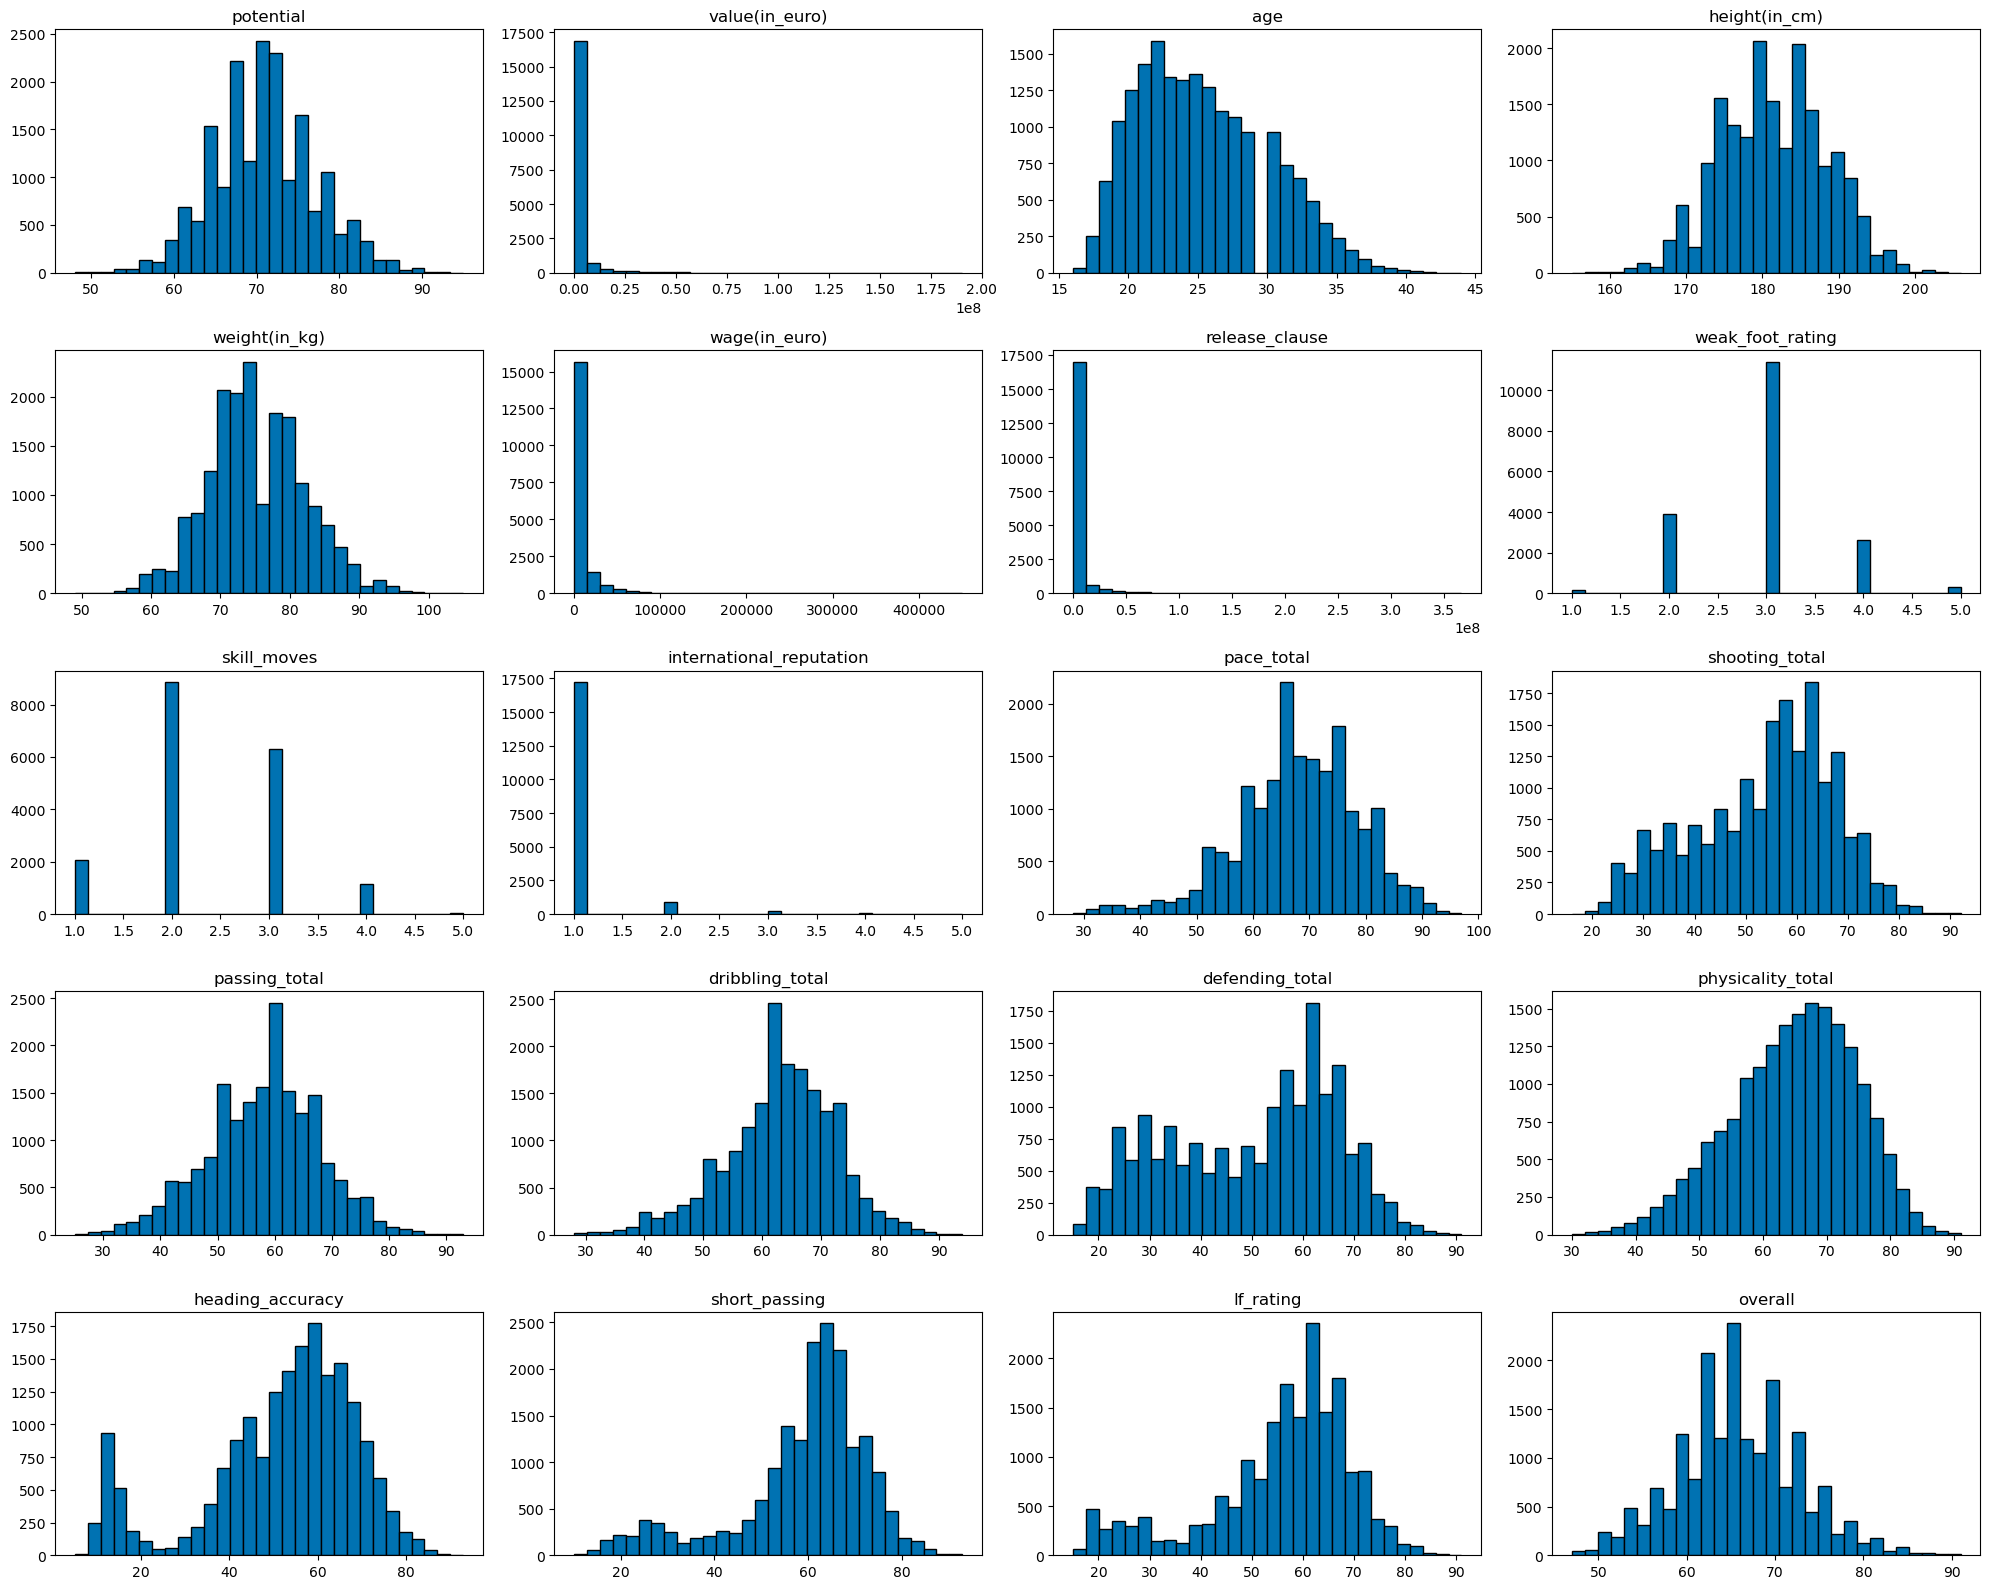

In [25]:
color = '#0072B2'

# grid size
nrows, ncols = 5, 4  # adjust for your number of features

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

# Plot each numerical feature
for i, ax in enumerate(axes):
    if i >= len(num.columns):
        ax.set_visible(False)  # hide unesed plots
        continue
    ax.hist(num.iloc[:, i], bins=30, color=color, edgecolor='black')
    ax.set_title(num.columns[i])

plt.tight_layout()
plt.show()

### Exercise 2: How do we interpret these histograms?

In [26]:
# We can see that e.g. some distributions ale close to normal - like e.g. height or passing_total
# and some distrubutions are skewed - e.g. age distribution is skewed to the left,
# reflecting the fact that most professional football players are under 30, 
# they start their career at the same time and finish it at different ages - the oldest about the age 40.

In [28]:
boxplot = num[['value(in_euro)', 'wage(in_euro)', 'release_clause', 'dribbling_total', 'short_passing', 'lf_rating']]

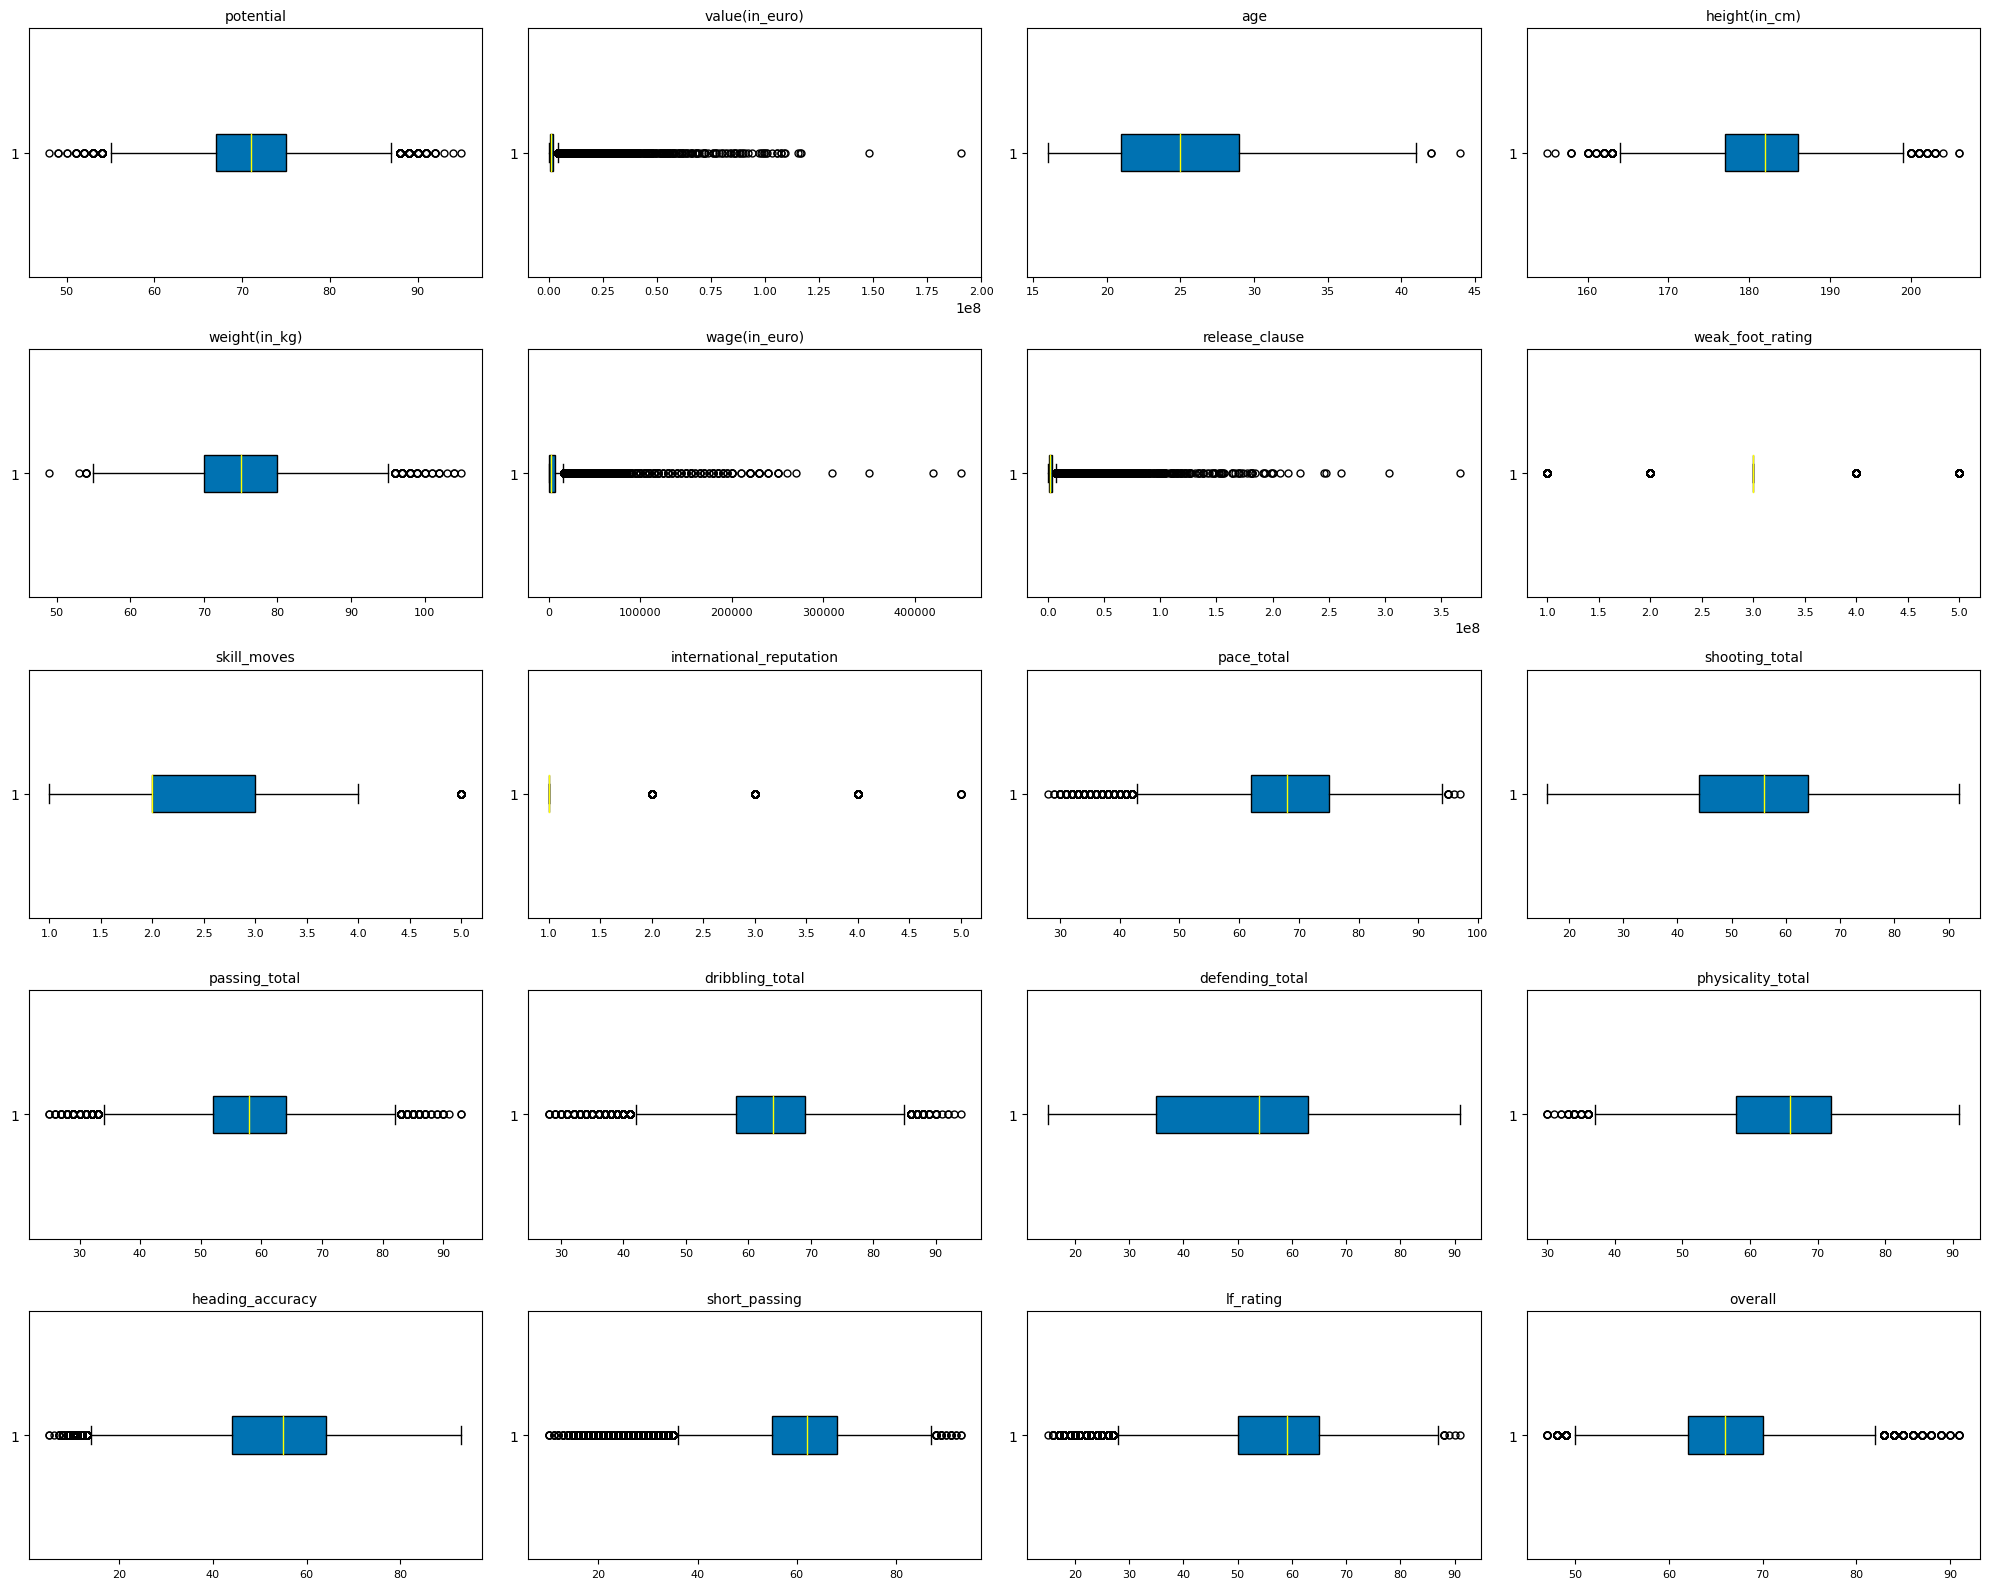

In [29]:
color = '#0072B2'

# grid size
nrows, ncols = 5, 4 

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

for i, ax in enumerate(axes):
    if i >= len(num.columns):
        ax.set_visible(False)
        continue
    ax.boxplot(num.iloc[:, i].dropna(), vert=False, patch_artist=True, 
               boxprops=dict(facecolor=color, color='black'), 
               medianprops=dict(color='yellow'), whiskerprops=dict(color='black'), 
               capprops=dict(color='black'), flierprops=dict(marker='o', color='red', markersize=5))
    ax.set_title(num.columns[i], fontsize=10)
    ax.tick_params(axis='x', labelsize=8)

plt.tight_layout()
plt.show()

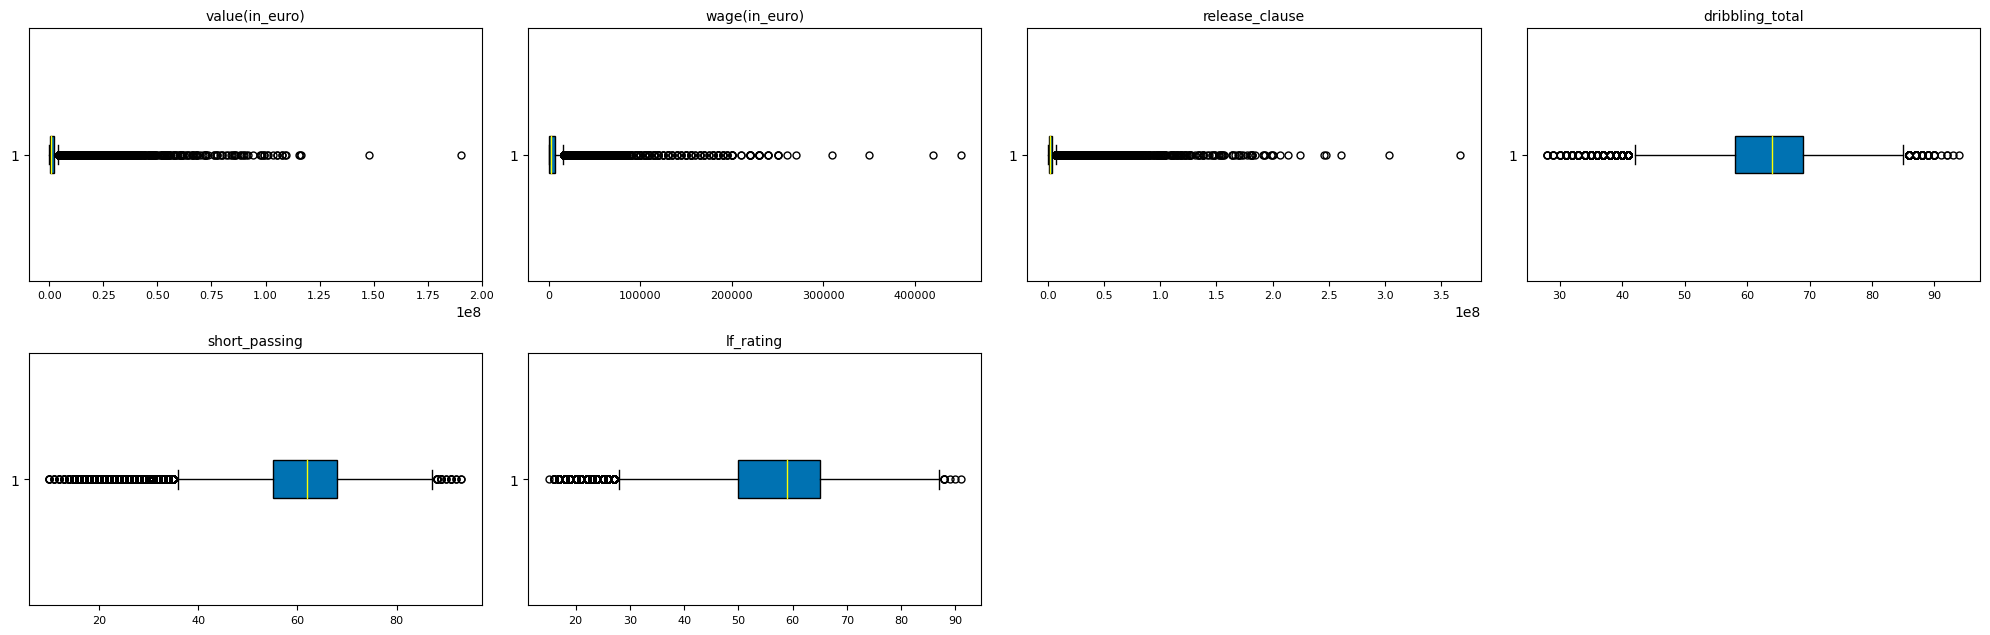

In [30]:
color = '#0072B2'

# grid size
nrows, ncols = 5, 4 

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

for i, ax in enumerate(axes):
    if i >= len(boxplot.columns):
        ax.set_visible(False)
        continue
    ax.boxplot(boxplot.iloc[:, i].dropna(), vert=False, patch_artist=True, 
               boxprops=dict(facecolor=color, color='black'), 
               medianprops=dict(color='yellow'), whiskerprops=dict(color='black'), 
               capprops=dict(color='black'), flierprops=dict(marker='o', color='red', markersize=5))
    ax.set_title(boxplot.columns[i], fontsize=10)
    ax.tick_params(axis='x', labelsize=8)  # Adjust x-axis ticks

plt.tight_layout()
plt.show()

### Exercise 3: What conclusions can you draw from the box plots?

In [ ]:
#We can see e.g. that the most footbal players are of low value in euro, 
#as the median and iqr (50%) are close to zero, 
#and even the right whisker (Q3+1.5IQR) is close to zero
#but there are some players of high value represented with outliers.
#We can see that e.g. the median age of players is about 25,
#with 50% of players being ~21-29.
#Whiskers (Q1-1.5IQR, Q3+1.5IQR) are 

<h2 style="color: #008080;">Looking for Correlations</h2>

In [27]:
num_corr = round(num.corr(),2)
num_corr

,potential,value(in_euro),age,height(in_cm),weight(in_kg),wage(in_euro),release_clause,weak_foot_rating,skill_moves,international_reputation,pace_total,shooting_total,passing_total,dribbling_total,defending_total,physicality_total,heading_accuracy,short_passing,lf_rating,overall
potential,1.00,0.53,-0.26,0.02,-0.00,0.50,0.51,0.15,0.27,0.33,0.29,0.28,0.45,0.50,0.18,0.20,0.19,0.37,0.34,0.66
value(in_euro),0.53,1.00,0.03,0.01,0.03,0.82,0.98,0.15,0.25,0.58,0.20,0.27,0.40,0.40,0.16,0.23,0.17,0.30,0.29,0.56
age,-0.26,0.03,1.00,0.07,0.22,0.15,0.03,0.06,0.06,0.24,-0.14,0.25,0.34,0.22,0.23,0.44,0.16,0.15,0.11,0.45
height(in_cm),0.02,0.01,0.07,1.00,0.75,0.03,0.01,-0.16,-0.43,0.04,-0.37,-0.08,-0.18,-0.27,0.04,0.41,0.01,-0.34,-0.44,0.03
weight(in_kg),-0.00,0.03,0.22,0.75,1.00,0.05,0.02,-0.13,-0.35,0.08,-0.32,-0.01,-0.09,-0.18,0.05,0.49,0.04,-0.27,-0.35,0.13
wage(in_euro),0.50,0.82,0.15,0.03,0.05,1.00,0.79,0.16,0.26,0.63,0.16,0.29,0.43,0.42,0.19,0.27,0.20,0.32,0.31,0.60
release_clause,0.51,0.98,0.03,0.01,0.02,0.79,1.00,0.14,0.23,0.55,0.19,0.26,0.38,0.38,0.16,0.22,0.15,0.28,0.27,0.53
weak_foot_rating,0.15,0.15,0.06,-0.16,-0.13,0.16,0.14,1.00,0.34,0.13,0.16,0.22,0.22,0.25,-0.02,0.03,0.19,0.31,0.37,0.20
skill_moves,0.27,0.25,0.06,-0.43,-0.35,0.26,0.23,0.34,1.00,0.19,0.36,0.31,0.34,0.43,0.03,-0.04,0.43,0.69,0.81,0.36
international_reputation,0.33,0.58,0.24,0.04,0.08,0.63,0.55,0.13,0.19,1.00,0.04,0.25,0.35,0.32,0.13,0.19,0.14,0.23,0.21,0.45


<div class="alert alert-block alert-info">
Tip # 4
    
- We don't want multicolinearity --> correlation between features biases the model...
- We want high correlations (+ or -) with the target --> valuable information for the predictions</div>

#### Checking correlations with [Seaborn](https://seaborn.pydata.org/index.html)

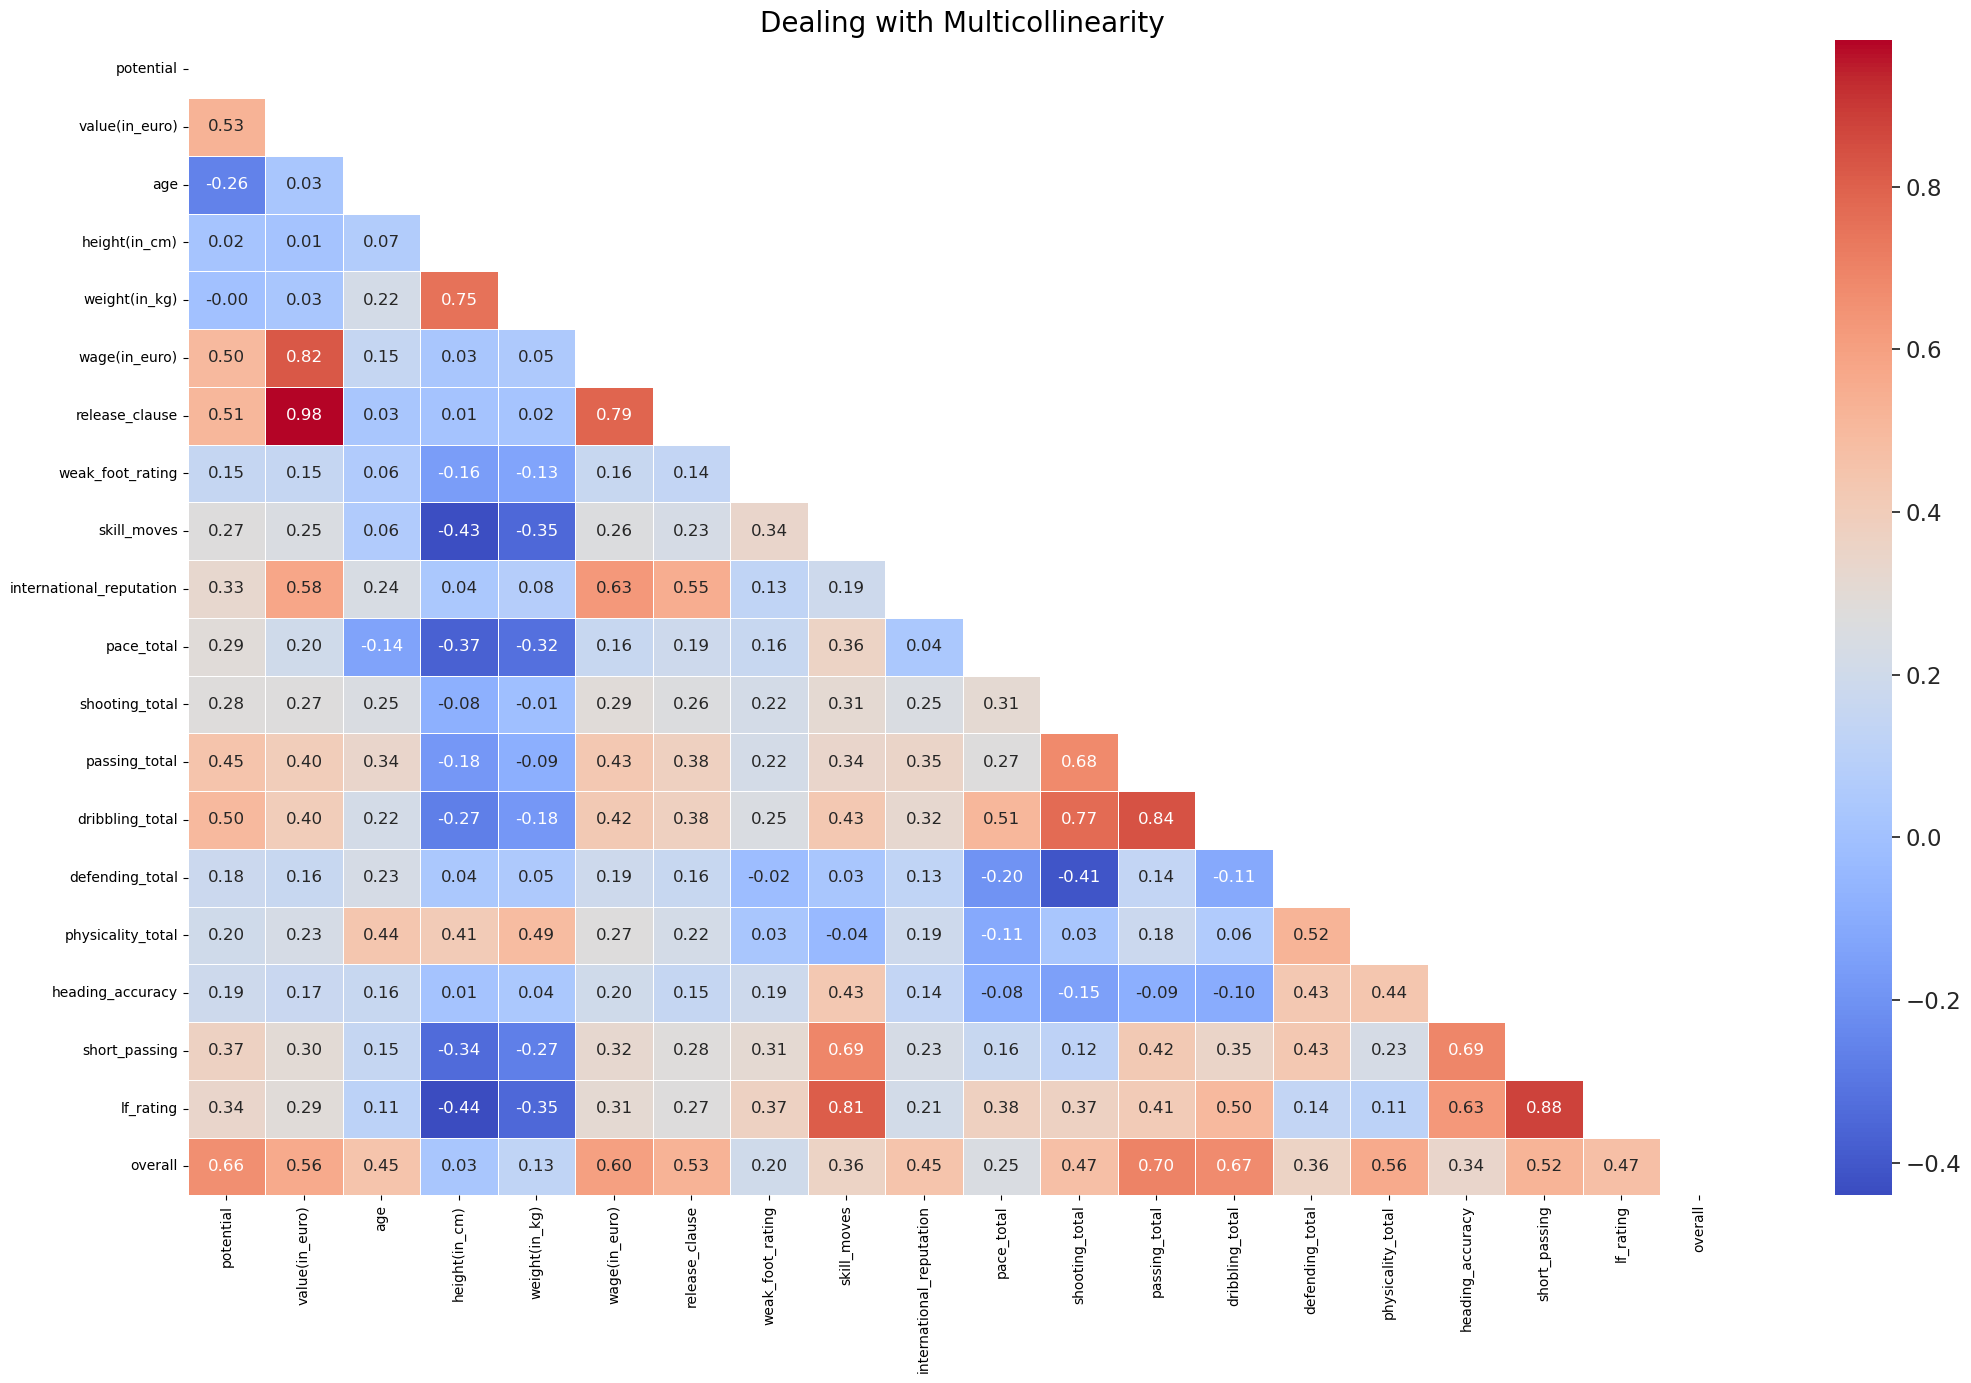

In [32]:
# Correlation Matrix-Heatmap Plot
mask = np.zeros_like(num_corr)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix
f, ax = plt.subplots(figsize=(25, 15))
sns.set(font_scale=1.5) # increase font size
ax = sns.heatmap(num_corr, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="coolwarm", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Dealing with Multicollinearity", fontsize=20) # add title
plt.show()

### Exercise 4: How would we interpret the matrix? What other correlation techniques are we aware of?

In [33]:
# your solution
# There is an additional strong relationship between release clause and value in euro, this can affect ML prediciting performance.
# release clause to be dropped

### Specific Correlations with the Target

In [32]:
pearson_correlations = num.corrwith(df['overall'])
pearson_correlations.sort_values(ascending=False)

overall                     1.000000
passing_total               0.698714
dribbling_total             0.674058
potential                   0.657323
wage(in_euro)               0.598478
physicality_total           0.560810
value(in_euro)              0.560209
release_clause              0.529659
short_passing               0.520006
lf_rating                   0.474095
shooting_total              0.465091
international_reputation    0.450971
age                         0.446743
defending_total             0.361420
skill_moves                 0.360564
heading_accuracy            0.341229
pace_total                  0.249877
weak_foot_rating            0.199860
weight(in_kg)               0.132019
height(in_cm)               0.033450
dtype: float64

In [48]:
spearman_correlations = num.corrwith(df['overall'], method='spearman')
spearman_correlations.sort_values(ascending=False)

overall                     1.000000
value(in_euro)              0.851724
wage(in_euro)               0.737225
release_clause              0.693360
dribbling_total             0.689605
passing_total               0.680891
short_passing               0.649622
potential                   0.600679
lf_rating                   0.572819
physicality_total           0.562370
shooting_total              0.484516
age                         0.481939
heading_accuracy            0.412939
defending_total             0.396905
international_reputation    0.380685
skill_moves                 0.357039
pace_total                  0.277864
weak_foot_rating            0.187035
weight(in_kg)               0.121083
height(in_cm)               0.026542
dtype: float64

### Formulate the Null Hypothesis, anStatistical Tests

In [ ]:
#NULL Hypothesis - no correlation between passsing_total and overall 

In [53]:
correlation, p_value = pearsonr(df['overall'], df['passing_total'])
print("Pearson correlation:", correlation, " p-value:", p_value)

Pearson correlation: 0.6987141904071135  p-value: 0.0


In [54]:
correlation, p_value = spearmanr(df['overall'], df['passing_total'])
print("Spearman correlation:", correlation, " p-value:", p_value)

Spearman correlation: 0.6808906898730583  p-value: 0.0


In [ ]:
#Pearson a little bit higher - outliers?

In [ ]:
#NULL Hypothesis - no correlation between value in euro and overall 

In [51]:
correlation, p_value = pearsonr(df['overall'], df['value(in_euro)'])
print("Pearson correlation:", correlation, " p-value:", p_value)

Pearson correlation: 0.5602089513916007  p-value: 0.0


In [52]:
correlation, p_value = spearmanr(df['overall'], df['value(in_euro)'])
print("Spearman correlation:", correlation, " p-value:", p_value)

Spearman correlation: 0.8517239310408565  p-value: 0.0


In [ ]:
#Spearman significantly higher - non-linear relationship?

In [49]:
correlation, p_value = spearmanr(df['overall'], df['height(in_cm)'])
print("Pearson correlation:", correlation, " p-value:", p_value)

Pearson correlation: 0.02654245140795019  p-value: 0.00031488082760688707


In [47]:
correlation, p_value = spearmanr(df['overall'], df['height(in_cm)'])
print("Pearson correlation:", correlation, " p-value:", p_value)

Pearson correlation: 0.02654245140795019  p-value: 0.00031488082760688707


In [50]:
#Correlation very weak, but statistically significant

Pearson correlation: 0.6896049633369589  p-value: 0.0


### Make 3 plots and explain the findings of the data

<Axes: xlabel='overall', ylabel='value(in_euro)'>

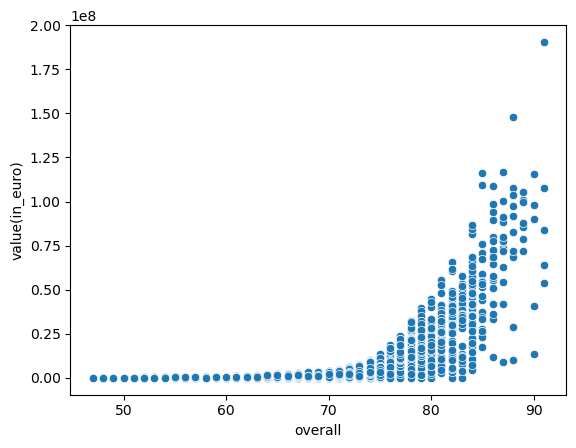

In [55]:
# Plotting a scatter plot to visualize the relationship between 'overall' and 'passing_total'
sns.scatterplot(data=df, x='overall', y='value(in_euro)')
#non-linear relstionship character explains why spearman is higher

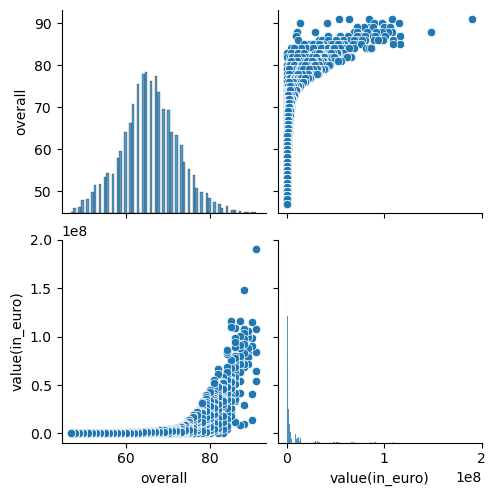

In [56]:
sns.pairplot(df[["overall", "value(in_euro)"]])

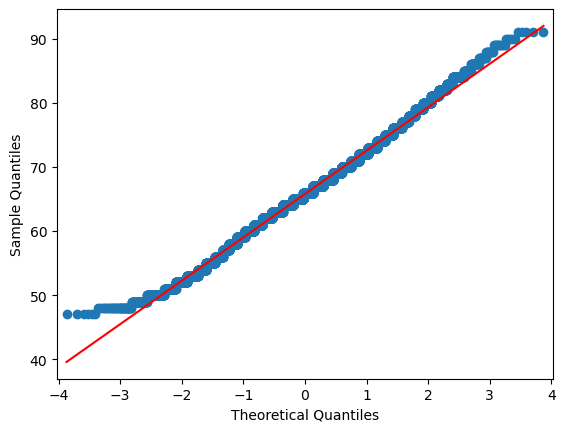

In [57]:
import statsmodels.api as sm
sm.qqplot(df['overall'], line='s');

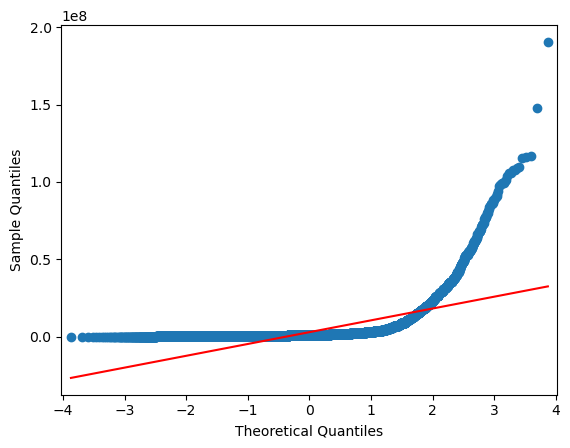

In [58]:
import statsmodels.api as sm
sm.qqplot(df['value(in_euro)'], line='s');

<h1 style="color: #00BFFF;">04 | Data Processing</h1>

<h2 style="color: #008080;">X-Y Split</h2>

<h2 style="color: #008080;">Normalizing the Data</h2>

<h1 style="color: #00BFFF;">05 | Modeling</h1>

<h2 style="color: #008080;">Train-Test Split</h2>

<h2 style="color: #008080;">Model Validation</h2>

<h1 style="color: #00BFFF;">06 | Improving the Model</h1>

<h1 style="color: #00BFFF;">07 | Reporting</h1>